# **TASK 1**

**IRIS CLASSIFICATION**

In [1]:
#Importing required libraries
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_curve, f1_score, auc, roc_auc_score, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
IR = load_iris()
IR

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
print(type(IR))
print(IR.DESCR)
print(dir(IR))

<class 'sklearn.utils._bunch.Bunch'>
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    =============

In [5]:
#Let us create a dataframe from the two ndarrays 'data' and 'target' from boston_dataset.
dataset = pd.DataFrame(data=IR.data, columns=IR.feature_names)
dataset['target'] = IR.target
dataset.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
dataset.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


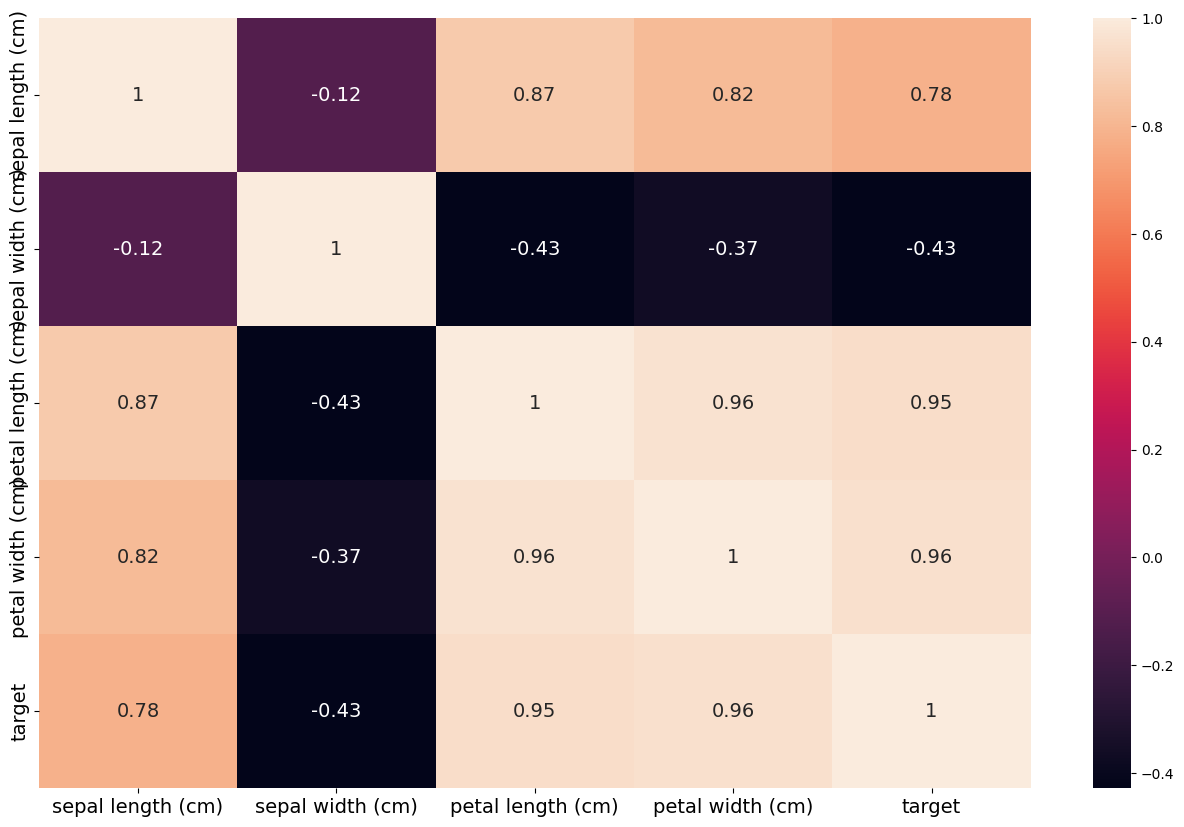

In [8]:
plt.figure(figsize=(16,10))
sns.heatmap(dataset.corr(),  annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [9]:
print(len(dataset[dataset.duplicated()]))


1


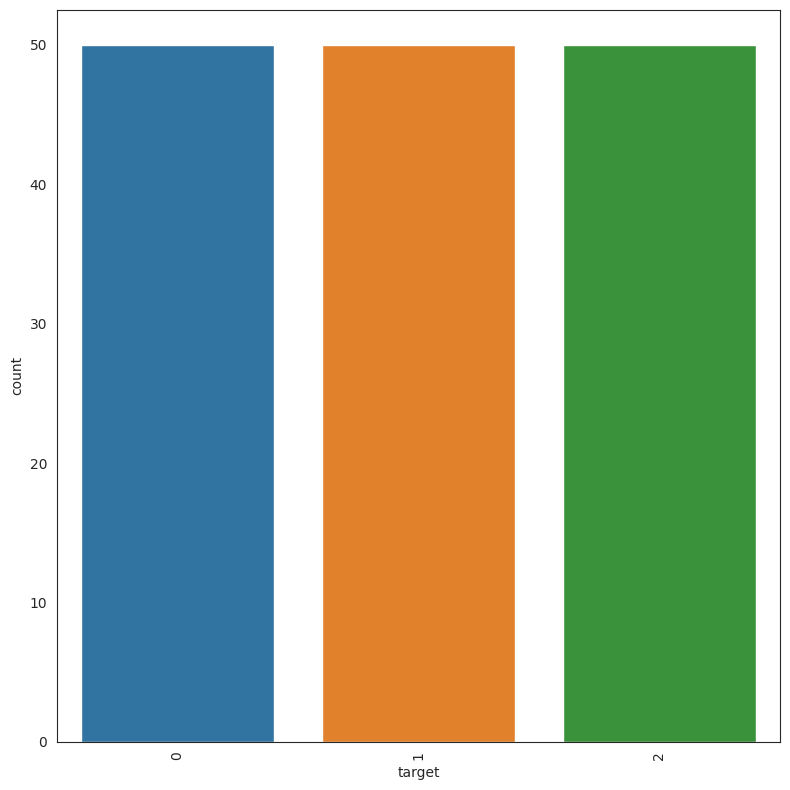

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(x='target', data=dataset)
plt.xticks(rotation=90)
#Rotate the x-axis labels by 90 degrees
plt.tight_layout()
#Adjust the layout to prevent overlapping labels
plt.show()

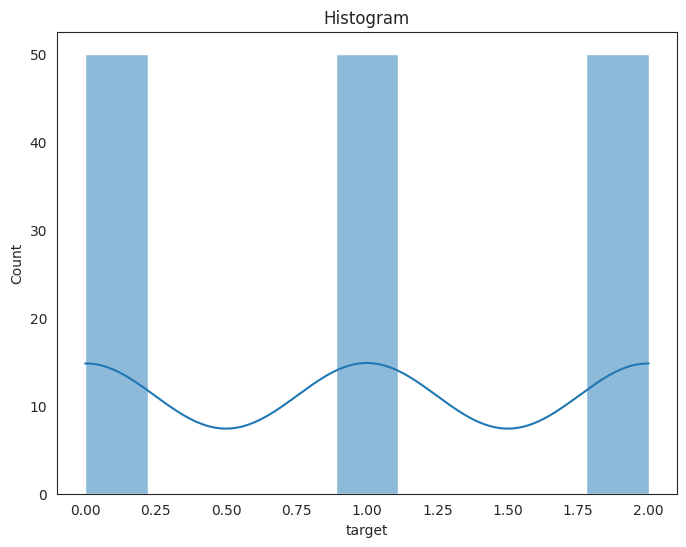

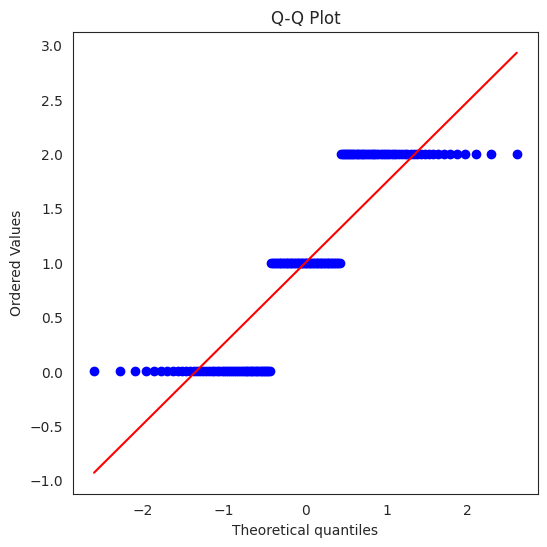

Shapiro-Wilk Test:
Test statistic: 0.7928978204727173
p-value: 2.716364459753873e-13
The dataset is not normally distributed.


In [11]:
target = dataset['target']

# Visual inspection: Histogram
plt.figure(figsize=(8, 6))
sns.histplot(target, kde=True)
plt.title('Histogram')
plt.show()

# Visual inspection: Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(target, plot=plt)
plt.title('Q-Q Plot')
plt.show()
# Shapiro-Wilk test
statistic, p_value = stats.shapiro(target)
alpha = 0.05  # Significance level

print("Shapiro-Wilk Test:")
print("Test statistic:", statistic)
print("p-value:", p_value)

if p_value > alpha:
    print("The dataset is normally distributed.")
else:
    print("The dataset is not normally distributed.")

In [12]:
scaler = MinMaxScaler()
columns_to_normalize = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])
print(dataset.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


Testing Accuracy: 1.0
Training Accuracy: 0.9583333333333334
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



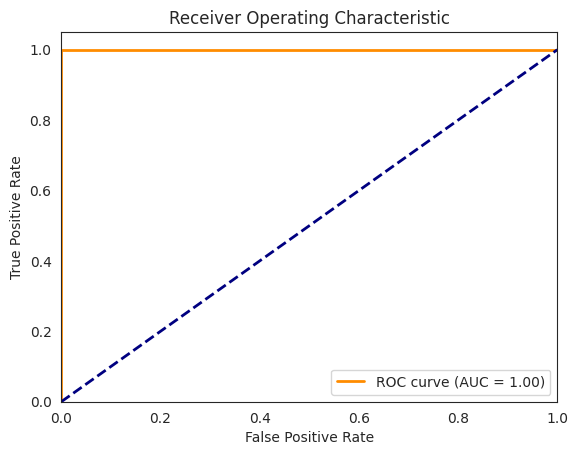

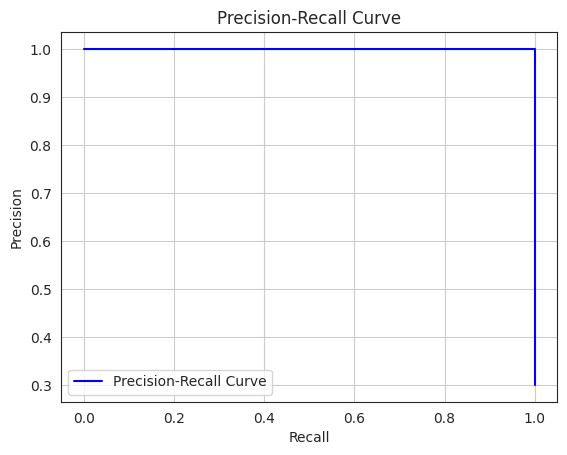

In [15]:
X = dataset.drop('target', axis=1)
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn1 = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2)
knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)
# Evaluate on testing set
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)
# Evaluate on the training set
y_train_pred = knn1.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

#Save
import pickle
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn1, file)

# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
target_names = IR.target_names
print(classification_report(y_test, y_pred, target_names=target_names))
# ROC Curve
y_pred_prob = knn1.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob[:, 1], pos_label=1)
plt.plot(recall, precision, color='b', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [16]:
with open('knn_model.pkl', 'rb') as model_file:
    knn_model = pickle.load(model_file)

# User input for Iris features
input_features = IR.feature_names
print("Enter your Inputs")
sepal_length = float(input("Sepal Length (cm): "))
sepal_width = float(input("Sepal Width (cm): "))
petal_length = float(input("Petal Length (cm): "))
petal_width = float(input("Petal Width (cm): "))
float_array = [sepal_length, sepal_width, petal_length, petal_width]
# Normalize the input data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform([float_array])
# Prediction
prediction = knn_model.predict(data_scaled)
# Map Iris species names
iris_species_names = IR.target_names
# Decode the predicted Iris species
decoded_pred = iris_species_names[prediction[0]]
print("Predicted Iris species:", decoded_pred)


Enter your Inputs
Sepal Length (cm): 2
Sepal Width (cm): 5
Petal Length (cm): 6
Petal Width (cm): 6
Predicted Iris species: setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
